<a href="https://colab.research.google.com/github/Lilchoto3/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












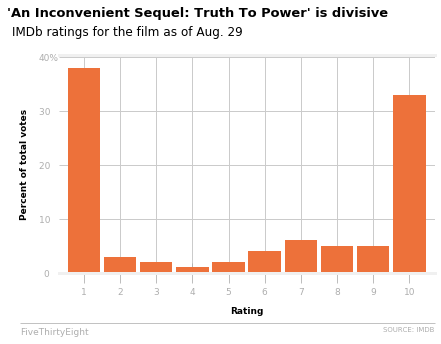

In [310]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
import pandas as pd

# Create the fake data
fake = pd.Series([38,3,2,1,2,4,6,5,5,33], index=range(1,11))

# Okay, lets start setting up the graph
fig, ax = plt.subplots()

# Tell it to plot the graph
ax.bar(x=range(1,11), height=fake, color='#ED713A', width=0.9)

# Make the background white
fig.set_facecolor(color='None')
ax.set_facecolor(color='None')

# Set up the tick marks
ax.set_xticks(range(1,11))
ax.set_yticks(range(0,41,10))

# Tick Labels
ax.set_yticklabels(['0   ','10   ','20   ','30   ','40%'], fontsize=9, color="#AEAEAE")
ax.set_xticklabels(range(1,11), fontsize=9, color="#AEAEAE")
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10

# Axis Labels
ax.set_xlabel('Rating', fontsize=9, fontweight='bold')
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

# Remove left and right spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make bottom spines stick out and left and right spines suck in
ax.tick_params(axis='x',which='major',direction='inout', length=20, pad=5, color="#AEAEAE")
ax.tick_params(axis='y',which='major',direction='inout', length=0, pad=0, color="#AEAEAE")

# Fiddle with margins to get the left and right sides of the graph sucked in
ax.margins(0.025,0.06)

# Set title of graph
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=13, x=.37, y=1.15, fontweight='bold')

# Set subtitle
ax.text(s="IMDb ratings for the film as of Aug. 29", y=44, x=-1, fontsize=12)

# Draw a footer line
fig.add_artist(lines.Line2D([-.01,.95], [-.05,-.05], color="#AEAEAE", linewidth=0.75))

# Add footer text
fig.text(x=-.01, y=-.09, s="FiveThirtyEight", color="#AEAEAE", fontsize=9)
fig.text(x=.83,y=-.08,s="SOURCE: IMDB", color="#AEAEAE", fontsize=7)

# Show the graph
plt.show()

In [0]:
# Part 2
# For this part I'm going to be replicating this graph: https://i.imgur.com/UIQekhW.png
# This graph is from: https://fivethirtyeight.com/features/pepe-the-frog-symbolism-cryptoart-blockchain/
# The graph represents the change of the cryptocurrency "Pepe Cash" over time

# Load my data
cash_price = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/rare-pepes/pepecash_prices.csv')

In [312]:
# See what I'm looking at
print(cash_price.shape)
cash_price.head(10)

(491, 2)


,Timestamp,Price
0,1517558400,0.052494
1,1517472000,0.041177
2,1517385600,0.062411
3,1517299200,0.064185
4,1517212800,0.071138
5,1517126400,0.073951
6,1517040000,0.074749
7,1516953600,0.068029
8,1516867200,0.083559
9,1516780800,0.080997


In [313]:
# These timestamps are UNIX timestamps, also the first one seems to be the most recent
# If I look at the tail, I can see what the first ones recorded look like
cash_price.tail(10)

,Timestamp,Price
481,1475910000,0.000075
482,1475823600,0.000073
483,1475737200,0.000087
484,1475650800,0.000088
485,1475564400,0.000071
486,1475478000,0.000069
487,1475391600,0.000069
488,1475305200,0.000037
489,1475218800,0.000084
490,1475132400,0.000092


In [314]:
# I also wanna check for null values, just in case
print(cash_price.isnull().sum())

Timestamp    0
Price        0
dtype: int64


In [315]:
# Looks clean, lets get the dtypes fixed up
cash_price.Timestamp = pd.to_datetime(cash_price.Timestamp, unit='s')
cash_price.head(10)

,Timestamp,Price
0,2018-02-02 08:00:00,0.052494
1,2018-02-01 08:00:00,0.041177
2,2018-01-31 08:00:00,0.062411
3,2018-01-30 08:00:00,0.064185
4,2018-01-29 08:00:00,0.071138
5,2018-01-28 08:00:00,0.073951
6,2018-01-27 08:00:00,0.074749
7,2018-01-26 08:00:00,0.068029
8,2018-01-25 08:00:00,0.083559
9,2018-01-24 08:00:00,0.080997


In [316]:
cash_price.tail(10)

,Timestamp,Price
481,2016-10-08 07:00:00,0.000075
482,2016-10-07 07:00:00,0.000073
483,2016-10-06 07:00:00,0.000087
484,2016-10-05 07:00:00,0.000088
485,2016-10-04 07:00:00,0.000071
486,2016-10-03 07:00:00,0.000069
487,2016-10-02 07:00:00,0.000069
488,2016-10-01 07:00:00,0.000037
489,2016-09-30 07:00:00,0.000084
490,2016-09-29 07:00:00,0.000092


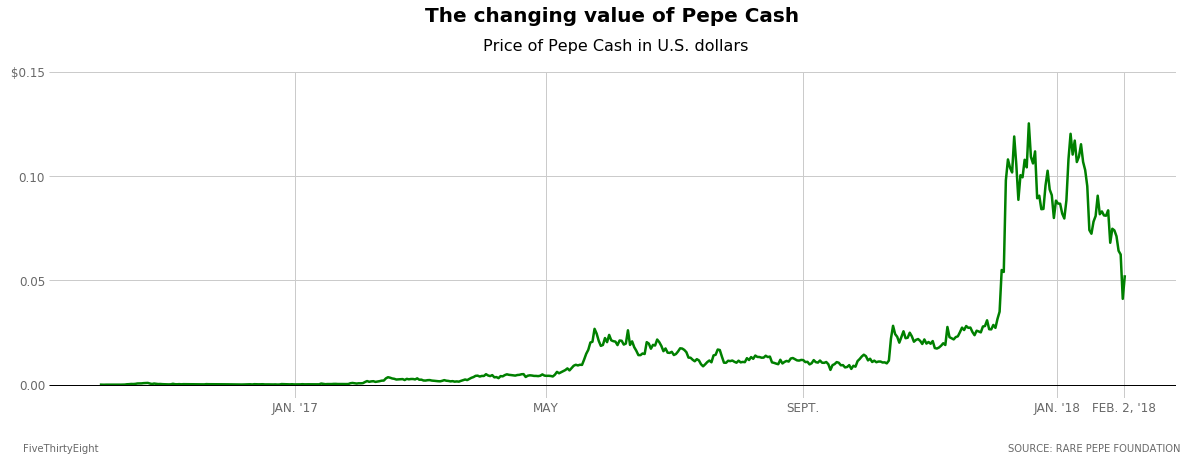

In [317]:
# Alright, that looks almost exactly like my graph, starting at the end of 2016 and ending in 2018
# Let's get plotting
fig, ax = plt.subplots()

# Set up stylesheet

# Plot func
ax.plot(cash_price.Timestamp, cash_price.Price, color='green', linewidth=2.5)

# Stretch it out
fig.set_figheight(6)
fig.set_figwidth(18)

# Make background white
fig.set_facecolor(color='None')
ax.set_facecolor(color='None')

# Set up ticks
dates_x = [1483228800, 1493596800, 1504224000, 1514764800, 1517529600]
dates_x = pd.to_datetime(dates_x, unit='s')
#print(dates_x)
ax.set_xticks(dates_x)
ax.set_yticks([0,0.05,0.1,0.15])

# Set up tick labels
ax.set_xticklabels(['JAN. \'17','MAY','SEPT.','JAN. \'18','FEB. 2, \'18'], fontsize=12, color='#696969')
ax.set_yticklabels(['0.00','0.05','0.10',' $0.15'], fontsize=12, color='#696969')

# Remove frame of graph
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add base horizontal line
ax.axhline(y=0, linewidth=1, color='black')

# Add vertical line for final date

# Add title
ax.set_title("The changing value of Pepe Cash", fontsize=20, pad=50, fontweight='bold')

# Add subtitle
ax.text(s="Price of Pepe Cash in U.S. dollars", x=736420, y=0.16, fontsize=16)

# Add footer text
fig.text(s="FiveThirtyEight",x=.06,y=0, color="#696969")
fig.text(s="SOURCE: RARE PEPE FOUNDATION",x=0.82,y=0, color="#696969")

plt.show()

In [318]:
from IPython.display import display, Image

url = 'https://i.imgur.com/UIQekhW.png'
example = Image(url=url)

display(example)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here